In [32]:
file="I1_2018"
risky=True
money=10

In [33]:
import numpy as np
import pandas as pd

In [34]:
data = pd.read_csv("../../data/Dataset2/"+file+".csv")

In [35]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,I1,18/08/2018,Chievo,Juventus,2,3,A,1,1,D,...,2.13,19,2.00,1.68,1.64,2.38,2.29,18.84,6.42,1.22
1,I1,18/08/2018,Lazio,Napoli,1,2,A,1,1,D,...,2.17,20,0.00,2.12,2.07,1.83,1.79,2.78,3.57,2.59
2,I1,19/08/2018,Bologna,Spal,0,1,A,0,0,D,...,1.58,19,-0.25,1.97,1.92,1.99,1.94,2.31,3.18,3.59
3,I1,19/08/2018,Empoli,Cagliari,2,0,H,1,0,H,...,1.71,19,-0.25,1.98,1.91,1.98,1.94,2.54,3.42,2.95
4,I1,19/08/2018,Parma,Udinese,2,2,D,1,0,H,...,1.65,20,0.00,1.81,1.77,2.18,2.10,2.80,3.24,2.78


In [36]:
date=data[["Date"]]

In [37]:
week_numbers=[]

In [38]:
from datetime import datetime
def date_to_week(row):

    date=row.values[1]


    datetime_object = datetime.strptime(str(date), '%d/%m/%Y')
    extractedWeek= datetime_object.isocalendar()[1]
    if(extractedWeek not in week_numbers):
        week_numbers.append(extractedWeek)
    return week_numbers.index(extractedWeek)



In [39]:
data["Week"]=data.apply(date_to_week, axis = 1)

In [40]:
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Week
0,I1,18/08/2018,Chievo,Juventus,2,3,A,1,1,D,...,19,2.00,1.68,1.64,2.38,2.29,18.84,6.42,1.22,0
1,I1,18/08/2018,Lazio,Napoli,1,2,A,1,1,D,...,20,0.00,2.12,2.07,1.83,1.79,2.78,3.57,2.59,0
2,I1,19/08/2018,Bologna,Spal,0,1,A,0,0,D,...,19,-0.25,1.97,1.92,1.99,1.94,2.31,3.18,3.59,0
3,I1,19/08/2018,Empoli,Cagliari,2,0,H,1,0,H,...,19,-0.25,1.98,1.91,1.98,1.94,2.54,3.42,2.95,0
4,I1,19/08/2018,Parma,Udinese,2,2,D,1,0,H,...,20,0.00,1.81,1.77,2.18,2.10,2.80,3.24,2.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,I1,26/05/2019,Inter,Empoli,2,1,H,0,0,D,...,22,-1.50,2.11,2.05,1.85,1.81,1.27,6.36,10.94,34
376,I1,26/05/2019,Roma,Parma,2,1,H,1,0,H,...,20,-2.00,1.89,1.85,2.10,2.01,1.17,8.59,16.35,34
377,I1,26/05/2019,Sampdoria,Juventus,2,0,H,0,0,D,...,20,0.50,2.03,1.96,1.95,1.90,3.06,3.55,2.40,34
378,I1,26/05/2019,Spal,Milan,2,3,A,1,2,A,...,21,1.00,2.10,2.02,1.89,1.84,5.41,4.30,1.63,34


In [41]:
data = data[["HomeTeam", "AwayTeam", "FTR", "B365H", "B365D", "B365A", "Week"]]

In [42]:
def find_results(row, risky,money):
    global team_results
    home = row["HomeTeam"]
    away = row["AwayTeam"]
    res = row["FTR"]
    oddsH = row["B365H"]
    oddsD = row["B365D"]
    oddsA = row["B365A"]
    

    if(risky):    
        pred_index = np.array([oddsH, oddsD, oddsA]).argmax()
    else:
        pred_index = np.array([oddsH, oddsD, oddsA]).argmin()
    pred = np.array(["H", "D", "A"])[pred_index]
    
    if res == pred:
        return np.array([oddsH, oddsD, oddsA])[pred_index]*money
    else:
        return 0

In [43]:
data["Return"]=data.apply(find_results, args=(risky,money), axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data.head(60)

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Week,Return
0,Chievo,Juventus,A,13.00,5.75,1.25,0,0.0
1,Lazio,Napoli,A,2.80,3.40,2.50,0,0.0
2,Bologna,Spal,A,2.25,3.20,3.40,0,34.0
3,Empoli,Cagliari,H,2.14,3.20,3.60,0,0.0
4,Parma,Udinese,D,2.45,3.30,2.90,0,33.0
5,Sassuolo,Inter,H,5.50,4.00,1.61,0,55.0
6,Torino,Roma,A,3.50,3.50,2.10,0,0.0
7,Atalanta,Frosinone,H,1.36,4.50,11.00,1,0.0
8,Juventus,Lazio,H,1.36,5.00,8.50,1,0.0
9,Napoli,Milan,H,1.61,4.00,5.50,1,0.0


In [45]:
data=data[["Week","Return"]]

In [46]:
final = pd.DataFrame(columns= ["Count","Input"])

In [47]:
data.head()

,Week,Return
0,0,0.0
1,0,0.0
2,0,34.0
3,0,0.0
4,0,33.0


In [48]:
final=data.groupby(["Week"],as_index=False).count()
final.columns =["Week","Input"]
final["Input"]=final["Input"]*money

In [49]:
final["Output"]=data.groupby(["Week"]).sum()

In [50]:
final

,Week,Input,Output
0,0,70,122.0
1,1,100,33.0
2,2,110,125.0
3,3,90,152.5
4,4,120,127.5
5,5,190,33.0
6,6,110,102.5
7,7,90,117.5
8,8,100,77.5
9,9,120,34.0


In [51]:
final["Return"]=final["Output"]-final["Input"]

In [52]:
final.head()

,Week,Input,Output,Return
0,0,70,122.0,52.0
1,1,100,33.0,-67.0
2,2,110,125.0,15.0
3,3,90,152.5,62.5
4,4,120,127.5,7.5


In [53]:
final["Return"]=final["Return"].cumsum()

In [ ]:
risky= "_risky" if risky else ""

In [54]:
final=final[["Week","Return"+file+"_"+str(money)+risky]]

In [55]:
final

,Week,Return
0,0,52.0
1,1,-15.0
2,2,0.0
3,3,62.5
4,4,70.0
5,5,-87.0
6,6,-94.5
7,7,-67.0
8,8,-89.5
9,9,-175.5


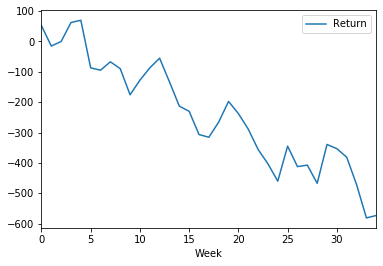

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

final.plot(kind='line',x='Week',y='Return',ax=ax)


plt.show()

In [57]:
risky= "_risky" if risky else ""

In [58]:
# final.to_csv("../data/Computed/AccumulatingChart/"+file+"_"+str(money)+risky+".csv", index=False)

In [59]:
risky

'_risky'

In [60]:
final1=final

In [62]:
final2=final

In [63]:
result = pd.merge(final1, final2, on='Week')

In [64]:
result

,Week,Return_x,Return_y
0,0,63.0,52.0
1,1,60.0,-15.0
2,2,65.0,0.0
3,3,81.0,62.5
4,4,7.0,70.0
5,5,141.3,-87.0
6,6,249.8,-94.5
7,7,491.8,-67.0
8,8,404.8,-89.5
9,9,424.8,-175.5
